# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE='SpamData/03_Testing/prob-spam-bidon.txt'
TOKEN_HAM_PROB_FILE='SpamData/03_Testing/prob-ham-bidon.txt'
TOKEN_ALL_PROB_FILE='SpamData/03_Testing/prob-all-tokens-bidon.txt'

TEST_FEATURE_MATRIX='SpamData/03_Testing/test-features-bidon.txt'
TEST_TARGET_FILE='SpamData/03_Testing/test-target-bidon.txt'

VOCAB_SIZE=2500

# Load data

In [3]:
# Features
X_test=np.loadtxt(TEST_FEATURE_MATRIX,delimiter=' ')
#Target
y_test=np.loadtxt(TEST_TARGET_FILE,delimiter=' ')
#Token prob
prob_token_spam=np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter=' ')
prob_token_ham=np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter=' ')
prob_all_tokens=np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter=' ')

In [4]:
X_test.shape

(1717, 2500)

In [5]:
prob_token_spam.shape

(2500,)

## Set the Prior
$$P(Spam\,|\,X)=\frac{P(X\,|\,Spam\,)\,P(Spam)} {P(X)}$$

In [6]:
PROB_SPAM=0.3125

In [7]:
np.log(prob_token_spam)

array([ -4.68295798,  -5.28591532,  -4.92739403, ..., -10.08788508,
        -9.60237726, -10.78103226])

## Joint prob in log format

In [8]:
joint_log_spam=X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens))+np.log(PROB_SPAM)

In [9]:
joint_log_spam[:5]

array([ 9.73313812, -3.35283681, -1.2176411 , -5.96454856, -4.37008607])

In [10]:
joint_log_ham=X_test.dot(np.log(prob_token_ham)-np.log(prob_all_tokens))+np.log(1-PROB_SPAM)

# making Predictions
## checking for higher joint prob
$$P(Spam\,|\,X)\,>\,P(Ham\,|\,X)$$
<center>OR</center>
<br>
$$P(Spam\,|\,X)\,<\,P(Ham\,|\,X)$$

In [11]:
prediction=joint_log_spam>joint_log_ham

In [12]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [13]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [14]:
#Simplify

joint_log_spam=X_test.dot(np.log(prob_token_spam))+np.log(PROB_SPAM)
joint_log_ham=X_test.dot(np.log(prob_token_ham))+np.log(1-PROB_SPAM)

# Metric and Evaluation
## Accuracy

In [15]:
correct_docs = (y_test==prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong=X_test.shape[0]-correct_docs
print('Docs classified incorretly',numdocs_wrong)

Docs classified correctly 1597
Docs classified incorretly 120


In [16]:
correct_docs/len(X_test)

0.930110658124636

# Visualising the rsults

In [17]:
yaxis_label= 'P(X | Spam)'
xaxis_label= 'P(X | Nonspam)'

linedata=np.linspace(start=-14000,stop=1,num=1000)

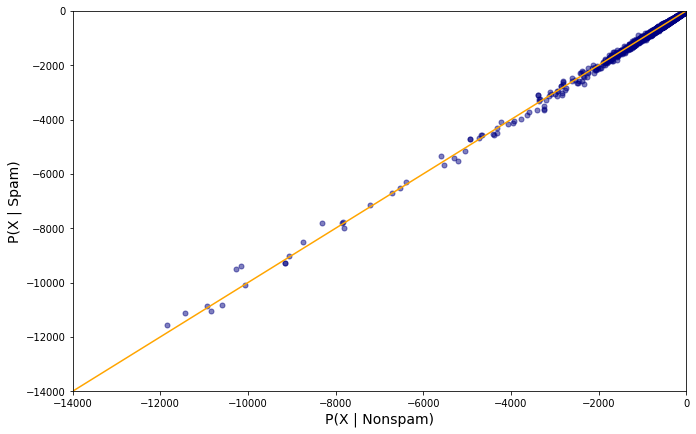

In [18]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=25)
plt.plot(linedata,linedata,color='orange')

plt.show()

 ## Decision boundary

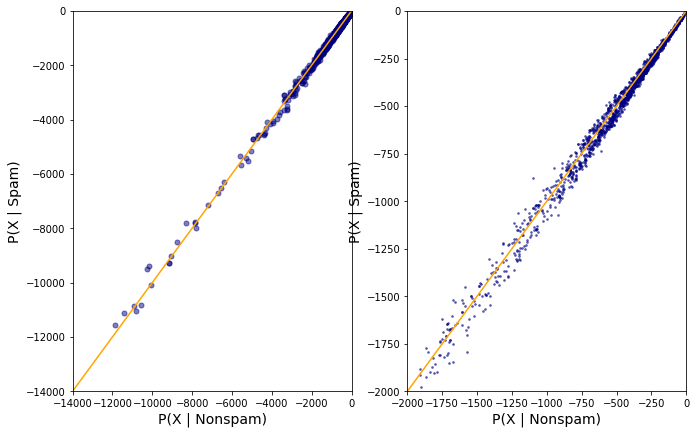

In [19]:
plt.figure(figsize=(11,7))

plt.subplot(1,2,1)

plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=25)
plt.plot(linedata,linedata,color='orange')

plt.subplot(1,2,2)

plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=3)
plt.plot(linedata,linedata,color='orange')

plt.show()

In [21]:
#Chart styling
sns.set_style('whitegrid')
labels='Actual Category'

summary_df=pd.DataFrame({yaxis_label:joint_log_spam,xaxis_label:joint_log_ham,
                        labels:y_test})

/home/bidonsaha007/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'show'

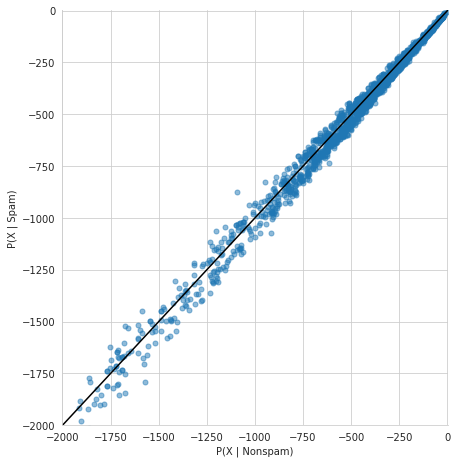

In [26]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,fit_reg=False,
          scatter_kws={'alpha':0.5,'s':25})

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata,linedata,color='black')

sns.show()

/home/bidonsaha007/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'show'

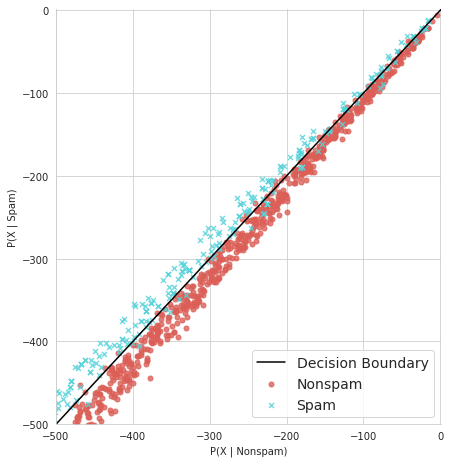

In [35]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,fit_reg=False,legend=False,
          scatter_kws={'alpha':0.8,'s':25},hue=labels,markers=['o','x'],
          palette='hls')

plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata,linedata,color='black')

plt.legend(('Decision Boundary','Nonspam','Spam'),loc='lower right',fontsize=14)

sns.show()

### False positive and False negative

In [36]:
np.unique(prediction,return_counts=True)

(array([False,  True]), array([1179,  538]))

In [37]:
true_pos=(y_test==1) & (prediction==1) # this is the bitwise &,not the boolean &

In [38]:
true_pos.sum()

500

In [41]:
false_pos=(y_test==0) & (prediction==1)

In [42]:
false_pos.sum()

38

In [43]:
false_neg=(y_test==1) & (prediction==0)
true_neg=(y_test==0) & (prediction==0)

In [45]:
false_neg.sum()


82

In [46]:
true_neg.sum()

1097

### Recall metric
$$Recall\,Score\,= \frac{True Postive\,(\,Correctly\,classified\,spam\,email)} {True Positive + False Negative\,(\,All\,the\,spam\,emails\,present\,)}$$

In [50]:
recall_score=true_pos.sum()/(true_pos.sum()+false_neg.sum()) 

In [53]:
print('Recall Score:{:.2%}'.format(recall_score))

Recall Score:85.91%


### Precision metric
$$Precision\,Score\,= \frac{True Postive\,(\,Correctly\,classified\,spam\,email)} {True Positive + False Positive\,}$$

In [54]:
precision_score=true_pos.sum()/(true_pos.sum()+false_pos.sum()) 

In [55]:
print('Precision Score:{:.2%}'.format(precision_score))

Precision Score:92.94%


## Note: Recall and Precision are inverse to each other

# F1 Score

In [56]:
f1_score=2* (precision_score*recall_score)/(precision_score+recall_score)
f1_score

0.8928571428571428